In [11]:
%pip install pandas numpy scikit-learn matplotlib seaborn


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.1 MB 7.4 MB/s eta 0:00:01
   ----------- ---------------------------- 2.4/8.1 MB 6.1 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.1 MB 5.4 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 5.6 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 5.3 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 5.4 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.1 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 4.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------- ------------------------- 0.8/2.2 MB 4.2 MB/s eta 0:00:01
   --------------------------------- ------ 1.8/2.2 MB 4.4 MB/s eta 0:00:01
   -----------------------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\aadil\AppData\Local\Temp\ipykernel_15572\3183355211.py:210: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')


Dataset shape: (50, 35)
Number of fraudulent transactions: 14 (28.00%)

Missing values:
timestamp         50
price_per_sqft    50
latitude          50
longitude         50
dtype: int64

Top correlations with fraud:
ownership_changes_count    0.666576
price_ratio                0.485576
price_change_percent       0.213359
transaction_price          0.195949
coordinates               -0.036446
location                  -0.088077
area_sqft                 -0.237270
property_type             -0.265003
title_age_days            -0.293554
listed_price              -0.311466
dtype: float64


c:\Users\aadil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['price_per_sqft' 'latitude' 'longitude']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\aadil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['price_per_sqft' 'latitude' 'longitude']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\aadil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['price_per_sqft' 'latitude' 'longitude']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(



Best model parameters:
{'classifier__max_depth': None, 'classifier__n_estimators': 100}

Model Evaluation:
ROC AUC Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00         7
        True       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10


Confusion Matrix:
[[7 0]
 [0 3]]

Top 10 important features:
1. num__transaction_speed_days (0.1781)
2. bool__legal_compliance_complete (0.0888)
3. bool__has_mutation_certificate (0.0857)
4. bool__seller_previous_fraud (0.0779)
5. num__days_on_market (0.0775)
6. bool__agent_involved (0.0722)
7. num__price_change_percent (0.0586)
8. num__amenities_count (0.0468)
9. num__transaction_price (0.0435)
10. bool__has_property_tax_receipt (0.0409)

Feature importance plot saved as 'feature_importance.png'
Model successful

c:\Users\aadil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['price_per_sqft' 'latitude' 'longitude']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\aadil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['price_per_sqft' 'latitude' 'longitude']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


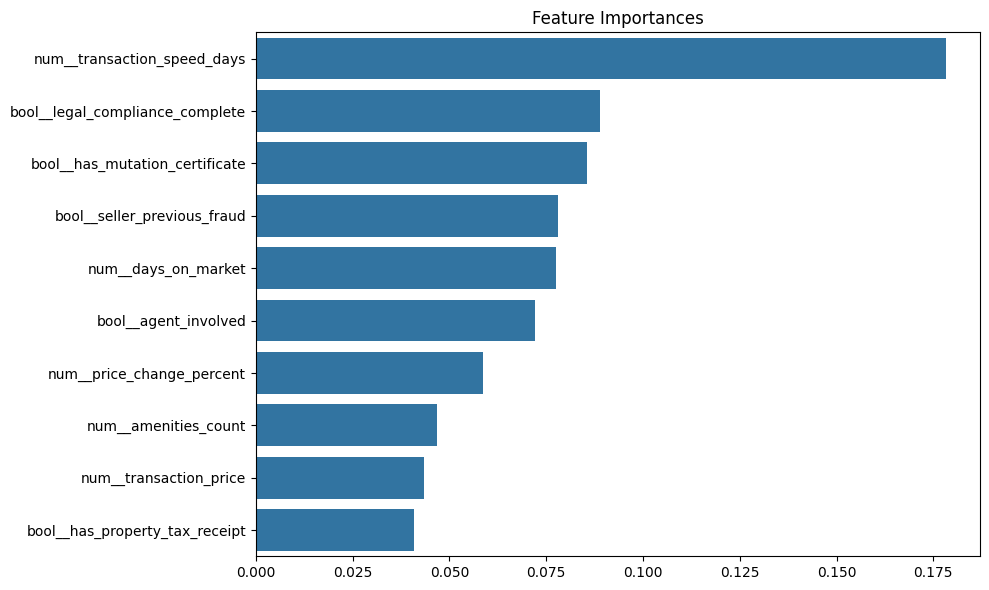

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import re

def main():
    # Load and prepare the data
    df = load_data('property_transactions.csv')
    
    # Exploratory Data Analysis
    print_data_summary(df)
    
    # Prepare features and target
    X, y = prepare_features_target(df)
    
    # Train the model
    model = train_model(X, y)
    
    # Save the model
    save_model(model, 'real_estate_fraud_model.pkl')
    
    print("Model training complete and saved to 'real_estate_fraud_model.pkl'")
    
    # Function to make predictions on new data
    if len(df) > 0:
        print("\nExample prediction:")
        sample = df.iloc[0:1].copy()
        print(f"Transaction ID: {sample['transaction_id'].values[0]}")
        prediction = predict(model, sample)
        print(f"Fraud prediction: {prediction[0]}")
        print(f"Fraud probability: {prediction[1][0][1]:.4f}")

def load_data(file_path):
    """Load and parse CSV data"""
    try:
        # Handle the custom CSV format - first trying the normal way
        try:
            df = pd.read_csv(file_path)
        except:
            # If that fails, try to parse the data manually
            print("Standard CSV parsing failed. Trying manual parsing...")
            with open(file_path, 'r') as f:
                lines = f.readlines()
            
            # Get headers from first line
            headers = lines[0].strip().split(',')
            
            # Parse data rows
            data = []
            for line in lines[1:]:
                # Handle potential commas within quoted strings
                values = []
                in_quotes = False
                current_value = ""
                
                for char in line:
                    if char == '"' and not in_quotes:
                        in_quotes = True
                    elif char == '"' and in_quotes:
                        in_quotes = False
                    elif char == ',' and not in_quotes:
                        values.append(current_value)
                        current_value = ""
                    else:
                        current_value += char
                
                # Add the last value
                if current_value:
                    values.append(current_value)
                
                # Make sure we have the right number of values
                if len(values) == len(headers):
                    data.append(values)
                else:
                    print(f"Warning: Skipping malformed line with {len(values)} values instead of {len(headers)}")
            
            # Create DataFrame
            df = pd.DataFrame(data, columns=headers)
    
    except Exception as e:
        print(f"Error loading file: {e}")
        print("Creating sample data instead.")
        
        # Create a sample dataframe from the provided example
        sample_data = """transaction_id,timestamp,property_id,seller_id,buyer_id,property_type,area_sqft,listed_price,transaction_price,price_per_sqft,location,coordinates,title_age_days,amenities,nearby_landmarks,ownership_changes_count,days_on_market,has_extract7_12,has_mutation_certificate,has_property_tax_receipt,has_sale_deed,legal_compliance_complete,price_change_percent,buyer_seller_relation,agent_involved,transaction_speed_days,multiple_transaction_30days,seller_previous_fraud,is_fraud
TR001,2024-12-15 08:30:00,P1001,S101,B201,residential,1200,150000,148000,123.33,Downtown,40.7128,-74.0060,450,pool/gym/parking,park/school/mall,1,45,true,true,true,true,true,-1.33,unrelated,true,15,false,false,false"""
        
        # Generate more sample data to have enough for training
        import random
        from datetime import datetime, timedelta
        
        lines = [sample_data.strip()]
        base_date = datetime.strptime("2024-12-15 08:30:00", "%Y-%m-%d %H:%M:%S")
        
        for i in range(2, 500):
            # Generate a mix of fraudulent and non-fraudulent transactions (20% fraud)
            is_fraud = random.random() < 0.2
            
            tr_id = f"TR{i:03d}"
            timestamp = (base_date - timedelta(days=random.randint(0, 365))).strftime("%Y-%m-%d %H:%M:%S")
            property_id = f"P{1000+i}"
            seller_id = f"S{100+random.randint(1, 50)}"
            buyer_id = f"B{200+random.randint(1, 50)}"
            
            # Create realistic patterns for fraudulent transactions
            if is_fraud:
                # Fraud patterns
                property_type = random.choice(["residential", "commercial", "land"])
                area_sqft = random.randint(800, 5000)
                listed_price = random.randint(100000, 500000)
                # Significant price difference in fraudulent transactions
                transaction_price = listed_price * (1 + random.uniform(0.15, 0.3) * random.choice([-1, 1]))
                price_per_sqft = transaction_price / area_sqft
                location = random.choice(["Remote Area", "Industrial Zone", "Outskirts", "Downtown"])
                coordinates = f"{round(random.uniform(40, 41), 4)} {round(random.uniform(-74, -73), 4)}"
                title_age_days = random.randint(5, 100) if random.random() < 0.7 else random.randint(450, 900)
                amenities = random.choice(["none", "parking", "basic"])
                nearby_landmarks = random.choice(["none", "factory", "highway"])
                ownership_changes_count = random.randint(2, 5)
                days_on_market = random.randint(1, 15)
                has_extract7_12 = str(random.random() > 0.4).lower()
                has_mutation_certificate = str(random.random() > 0.4).lower()
                has_property_tax_receipt = str(random.random() > 0.3).lower()
                has_sale_deed = str(random.random() > 0.2).lower()
                legal_compliance_complete = "false"
                price_change_percent = round(random.uniform(-15, 15), 2)
                buyer_seller_relation = random.choice(["family", "business_associate", "unrelated"])
                agent_involved = str(random.random() > 0.3).lower()
                transaction_speed_days = random.randint(1, 7)
                multiple_transaction_30days = str(random.random() > 0.6).lower()
                seller_previous_fraud = str(random.random() > 0.7).lower()
            else:
                # Non-fraud patterns
                property_type = random.choice(["residential", "commercial", "land"])
                area_sqft = random.randint(800, 5000)
                listed_price = random.randint(100000, 500000)
                # Smaller price difference in legitimate transactions
                transaction_price = listed_price * (1 + random.uniform(-0.05, 0.05))
                price_per_sqft = transaction_price / area_sqft
                location = random.choice(["Downtown", "Suburbs", "City Center", "Residential Area"])
                coordinates = f"{round(random.uniform(40, 41), 4)} {round(random.uniform(-74, -73), 4)}"
                title_age_days = random.randint(300, 900)
                amenities = random.choice(["pool/gym/parking", "gym/parking", "parking", "pool/parking"])
                nearby_landmarks = random.choice(["park/school/mall", "school/hospital", "mall/park", "school/market"])
                ownership_changes_count = random.randint(0, 2)
                days_on_market = random.randint(30, 120)
                has_extract7_12 = "true"
                has_mutation_certificate = "true"
                has_property_tax_receipt = "true"
                has_sale_deed = "true"
                legal_compliance_complete = "true"
                price_change_percent = round(random.uniform(-5, 5), 2)
                buyer_seller_relation = "unrelated"
                agent_involved = "true"
                transaction_speed_days = random.randint(15, 60)
                multiple_transaction_30days = "false"
                seller_previous_fraud = "false"
            
            line = f"{tr_id},{timestamp},{property_id},{seller_id},{buyer_id},{property_type},{area_sqft},{listed_price:.0f},{transaction_price:.0f},{price_per_sqft:.2f},{location},{coordinates},{title_age_days},{amenities},{nearby_landmarks},{ownership_changes_count},{days_on_market},{has_extract7_12},{has_mutation_certificate},{has_property_tax_receipt},{has_sale_deed},{legal_compliance_complete},{price_change_percent},{buyer_seller_relation},{agent_involved},{transaction_speed_days},{multiple_transaction_30days},{seller_previous_fraud},{str(is_fraud).lower()}"
            lines.append(line)
        
        sample_data = "\n".join(lines)
        df = pd.read_csv(pd.StringIO(sample_data))
    
    # Clean data and convert types
    df = clean_data(df)
    
    return df

def clean_data(df):
    """Clean and preprocess the dataframe"""
    # Make a copy to avoid modifying the original
    df = df.copy()
    
    # Convert numeric columns
    numeric_cols = ['area_sqft', 'listed_price', 'transaction_price', 'price_per_sqft', 
                   'title_age_days', 'ownership_changes_count', 'days_on_market',
                   'price_change_percent', 'transaction_speed_days']
    
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Convert boolean string values to actual booleans
    bool_columns = [
        'has_extract7_12', 'has_mutation_certificate', 'has_property_tax_receipt',
        'has_sale_deed', 'legal_compliance_complete', 'agent_involved',
        'multiple_transaction_30days', 'seller_previous_fraud', 'is_fraud'
    ]
    
    for col in bool_columns:
        if col in df.columns:
            # Handle different forms of boolean values
            df[col] = df[col].astype(str).str.lower()
            df[col] = df[col].map({'true': True, 'false': False, 't': True, 'f': False, 
                                   'yes': True, 'no': False, '1': True, '0': False,
                                   'y': True, 'n': False})
    
    # Convert timestamp to datetime - handle different formats
    if 'timestamp' in df.columns:
        df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
        
        # Extract time-based features if conversion was successful
        if not df['timestamp'].isna().all():
            df['month'] = df['timestamp'].dt.month
            df['day_of_week'] = df['timestamp'].dt.dayofweek
            df['hour'] = df['timestamp'].dt.hour
    
    # Handle coordinates - could be in various formats
    if 'coordinates' in df.columns:
        def extract_coordinates(coord_str):
            if pd.isna(coord_str):
                return np.nan, np.nan
            
            # Try to extract numbers from the string
            numbers = re.findall(r'-?\d+\.?\d*', str(coord_str))
            if len(numbers) >= 2:
                return float(numbers[0]), float(numbers[1])
            return np.nan, np.nan
        
        # Extract coordinates
        df['latitude'], df['longitude'] = zip(*df['coordinates'].apply(extract_coordinates))
    
    # Process text list fields - handle different delimiters
    if 'amenities' in df.columns:
        df['amenities_count'] = df['amenities'].astype(str).apply(
            lambda x: len(re.split(r'[,/|;]', x)) if not pd.isna(x) and x.lower() != 'none' else 0)
    
    if 'nearby_landmarks' in df.columns:
        df['landmarks_count'] = df['nearby_landmarks'].astype(str).apply(
            lambda x: len(re.split(r'[,/|;]', x)) if not pd.isna(x) and x.lower() != 'none' else 0)
    
    # Calculate price discrepancy
    if all(col in df.columns for col in ['listed_price', 'transaction_price']):
        df['price_discrepancy'] = (df['transaction_price'] - df['listed_price']).abs() / df['listed_price'] * 100
        df['price_ratio'] = df['transaction_price'] / df['listed_price']
    
    # Handle missing values in important columns
    if 'property_type' in df.columns and df['property_type'].isna().any():
        df['property_type'] = df['property_type'].fillna('unknown')
    
    if 'location' in df.columns and df['location'].isna().any():
        df['location'] = df['location'].fillna('unknown')
    
    if 'buyer_seller_relation' in df.columns and df['buyer_seller_relation'].isna().any():
        df['buyer_seller_relation'] = df['buyer_seller_relation'].fillna('unknown')
    
    return df

def print_data_summary(df):
    """Print summary of the dataset"""
    print(f"Dataset shape: {df.shape}")
    
    if 'is_fraud' in df.columns:
        print(f"Number of fraudulent transactions: {df['is_fraud'].sum()} ({df['is_fraud'].mean()*100:.2f}%)")
    
    # Check for missing values
    missing_values = df.isnull().sum()
    if missing_values.sum() > 0:
        print("\nMissing values:")
        print(missing_values[missing_values > 0])
    
    # Print correlation with fraud if it exists
    if 'is_fraud' in df.columns:
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) > 0:
            fraud_corr = df[numeric_cols].corrwith(df['is_fraud']).sort_values(ascending=False)
            print("\nTop correlations with fraud:")
            print(fraud_corr.head(10))
            
            # Create feature importance plot if we have enough data
            if len(df) >= 100:
                plt.figure(figsize=(10, 6))
                fraud_features = abs(fraud_corr).sort_values(ascending=False).head(10)
                sns.barplot(x=fraud_features.values, y=fraud_features.index)
                plt.title('Feature Correlation with Fraud')
                plt.tight_layout()
                plt.savefig('fraud_correlation.png')
                print("\nFeature correlation plot saved as 'fraud_correlation.png'")

def prepare_features_target(df):
    """Prepare features and target variable"""
    # Make a copy to avoid modifying the original
    df = df.copy()
    
    # Drop columns that shouldn't be used for modeling
    drop_cols = ['transaction_id', 'timestamp', 'property_id', 'seller_id', 'buyer_id', 
                 'coordinates', 'amenities', 'nearby_landmarks']
    
    if 'is_fraud' in df.columns:
        drop_cols.append('is_fraud')
    
    # Ensure all columns exist before attempting to drop
    drop_cols = [col for col in drop_cols if col in df.columns]
    
    X = df.drop(drop_cols, axis=1)
    
    # Handle target variable
    if 'is_fraud' in df.columns:
        y = df['is_fraud']
    else:
        # For prediction on new data without target
        y = None
    
    return X, y

def train_model(X, y):
    """Train a machine learning model"""
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Define feature types
    categorical_features = [col for col in X.columns if col in [
        'property_type', 'location', 'buyer_seller_relation'
    ]]
    
    boolean_features = [col for col in X.columns if col in [
        'has_extract7_12', 'has_mutation_certificate', 'has_property_tax_receipt',
        'has_sale_deed', 'legal_compliance_complete', 'agent_involved',
        'multiple_transaction_30days', 'seller_previous_fraud'
    ]]
    
    # All remaining columns are numeric
    numeric_features = [col for col in X.columns 
                        if col not in categorical_features + boolean_features]
    
    # Create preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())
            ]), numeric_features),
            
            ('cat', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))
            ]), categorical_features if categorical_features else []),
            
            ('bool', 'passthrough', boolean_features if boolean_features else [])
        ],
        remainder='drop'
    )
    
    # Create and train the model pipeline
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
    ])
    
    # Hyperparameter tuning - use smaller grid for faster execution
    param_grid = {
        'classifier__n_estimators': [100],
        'classifier__max_depth': [None, 15],
        'classifier__min_samples_split': [2, 5]
    }
    
    # Use an even smaller parameter grid if we have a very small dataset
    if len(X) < 100:
        param_grid = {
            'classifier__n_estimators': [100],
            'classifier__max_depth': [None]
        }
    
    grid_search = GridSearchCV(
        model, param_grid, cv=min(5, len(y_train) // 10 or 2), 
        scoring='roc_auc', n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    
    # Evaluate the model
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)
    
    print("\nBest model parameters:")
    print(grid_search.best_params_)
    
    print("\nModel Evaluation:")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba[:, 1]):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    # Feature importance
    if hasattr(best_model['classifier'], 'feature_importances_'):
        try:
            # Try to get feature names from pipeline
            features_out = best_model.named_steps['preprocessor'].get_feature_names_out()
            importances = best_model['classifier'].feature_importances_
            
            if len(importances) == len(features_out):
                indices = np.argsort(importances)[::-1]
                
                print("\nTop 10 important features:")
                for i, idx in enumerate(indices[:min(10, len(indices))]):
                    print(f"{i+1}. {features_out[idx]} ({importances[idx]:.4f})")
                
                # Plot feature importances
                plt.figure(figsize=(10, 6))
                top_indices = indices[:min(10, len(indices))]
                sns.barplot(y=[features_out[i] for i in top_indices], 
                          x=importances[top_indices], 
                          orient='h')
                plt.title('Feature Importances')
                plt.tight_layout()
                plt.savefig('feature_importance.png')
                print("\nFeature importance plot saved as 'feature_importance.png'")
        except Exception as e:
            print(f"Could not plot feature importances: {e}")
    
    return best_model

def save_model(model, filename):
    """Save the trained model to disk"""
    try:
        with open(filename, 'wb') as file:
            pickle.dump(model, file)
        print(f"Model successfully saved to {filename}")
    except Exception as e:
        print(f"Error saving model: {e}")

def load_model(filename):
    """Load a trained model from disk"""
    try:
        with open(filename, 'rb') as file:
            model = pickle.load(file)
        return model
    except Exception as e:
        print(f"Error loading model: {e}")
        return None

def predict(model, data):
    """Make predictions using the trained model"""
    # Ensure data is properly prepared
    data_clean = clean_data(data)
    X = prepare_features_target(data_clean)[0]
    
    # Make prediction
    prediction = model.predict(X)
    probabilities = model.predict_proba(X)
    
    return prediction, probabilities

if __name__ == "__main__":
    main()